In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path= '/gdrive/My Drive/ML:March2020/data/'


In [5]:
raw_data = pd.read_csv(path+'Chennai_house_univariate_train.csv')

In [6]:
raw_data.head(5)

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


In [7]:
raw_data.describe()

,Size,Price
count,97.000000,97.000000
mean,815.980000,19.908247
std,386.988353,17.767208
min,502.690000,6.300000
25%,570.770000,9.300000
50%,658.940000,12.700000
75%,857.810000,20.900000
max,2220.300000,86.400000


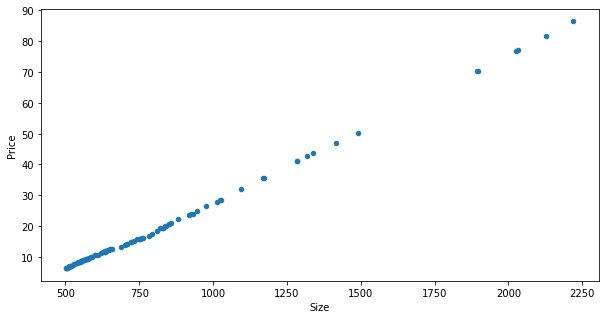

In [8]:
raw_data.plot(kind='scatter', x='Size', y='Price', figsize=(10,5))

In [9]:
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head

<bound method NDFrame.head of         Size     Price
0  -0.182399 -0.169891
1  -0.181840 -0.169891
2  -0.180786 -0.167394
3  -0.180507 -0.167394
4  -0.179878 -0.166145
..       ...       ...
92  0.628734  0.627862
93  0.705061  0.709011
94  0.709195  0.714004
95  0.763806  0.770184
96  0.817601  0.830109

[97 rows x 2 columns]>

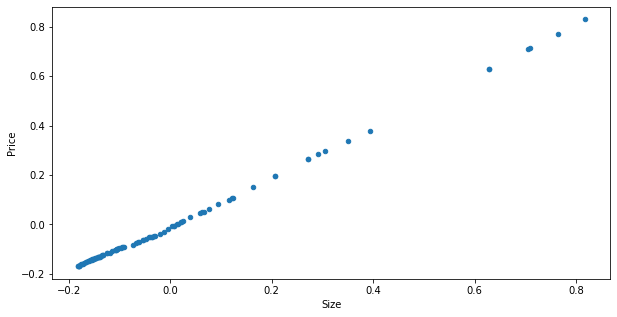

In [10]:
data.plot(kind='scatter', x='Size', y='Price', figsize=(10,5))

In [11]:
data.shape

(97, 2)

In [12]:
data.shape[0]

97

In [13]:
print(data.shape)
print(data.shape[0])
print(data.shape[1])

(97, 2)
97
2


In [14]:
data.insert(0,'Ones',1)


In [15]:
data.head(5)


,Ones,Size,Price
0,1,-0.182399,-0.169891
1,1,-0.181840,-0.169891
2,1,-0.180786,-0.167394
3,1,-0.180507,-0.167394
4,1,-0.179878,-0.166145


In [16]:
cols=data.shape[1]
print(cols)

3


In [17]:
x=data.iloc[:,0:cols-1]

In [18]:
y=data.iloc[:,cols-1:cols]

In [19]:
x=np.matrix(x)
y=np.matrix(y)
theta=np.matrix(np.array([0,0]))

In [20]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2)
  return np.sum(inner)/(2*len(x))

In [21]:
computeError(x,y,theta)

0.024346853685025278

In [22]:
def gradientDescent(x,y,theta,Learn_rate,iters):
  temp=np.matrix(np.zeros(theta.shape))
  parameters=theta.shape[1]
  cost=np.zeros(iters)
  for i in range (iters):
    error=(x*theta.T)-y
    for j in range(parameters):
      term=np.multiply(error,x[:,j])
      temp[0,j]=theta[0,j]-((Learn_rate/len(x))*np.sum(term))
    theta=temp
    cost[i]=computeError(x,y,theta)

  return theta, cost
      



In [23]:
Learn_rate=1.00
iters=150
new_theta,cost=gradientDescent(x,y,theta,Learn_rate,iters)
print(new_theta)

[[-1.03546896e-16  9.82955251e-01]]


In [24]:
print(cost)

[2.19673183e-02 1.98208708e-02 1.78846789e-02 1.61381471e-02
 1.45626971e-02 1.31415706e-02 1.18596508e-02 1.07033016e-02
 9.66022291e-03 8.71931915e-03 7.87058178e-03 7.10498263e-03
 6.41437789e-03 5.79142147e-03 5.22948685e-03 4.72259664e-03
 4.26535895e-03 3.85291006e-03 3.48086268e-03 3.14525926e-03
 2.84252994e-03 2.56945453e-03 2.32312827e-03 2.10093094e-03
 1.90049899e-03 1.71970039e-03 1.55661194e-03 1.40949886e-03
 1.27679627e-03 1.15709258e-03 1.04911449e-03 9.51713408e-04
 8.63853270e-04 7.84599488e-04 7.13109024e-04 6.48621422e-04
 5.90450714e-04 5.37978129e-04 4.90645505e-04 4.47949357e-04
 4.09435518e-04 3.74694309e-04 3.43356182e-04 3.15087786e-04
 2.89588427e-04 2.66586861e-04 2.45838419e-04 2.27122393e-04
 2.10239700e-04 1.95010753e-04 1.81273561e-04 1.68881998e-04
 1.57704253e-04 1.47621426e-04 1.38526264e-04 1.30322020e-04
 1.22921424e-04 1.16245755e-04 1.10224003e-04 1.04792112e-04
 9.98923035e-05 9.54724563e-05 9.14855561e-05 8.78891934e-05
 8.46451130e-05 8.171880

In [25]:
Model_price=x*new_theta.T

Text(0.5, 1.0, 'Predicted price vs Size')

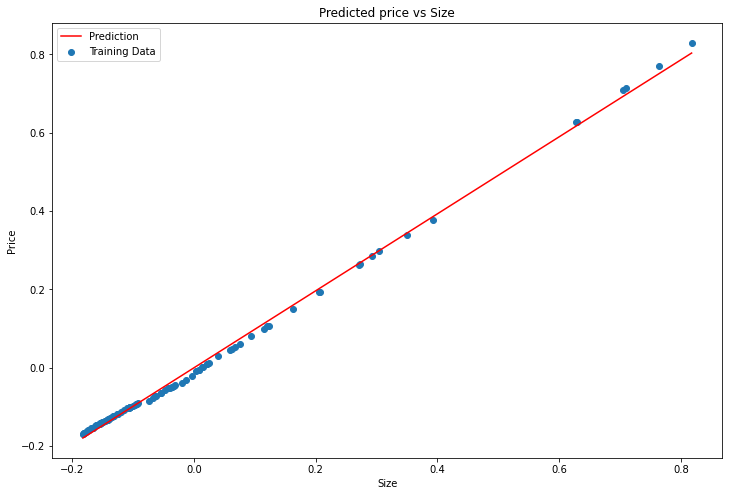

In [26]:
fig, ax= plt.subplots(figsize=(12,8))
ax.plot(data.Size,Model_price,'r',label='Prediction')
ax.scatter(data.Size,data.Price,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted price vs Size')


Text(0.5, 1.0, 'Error vs Iterations')

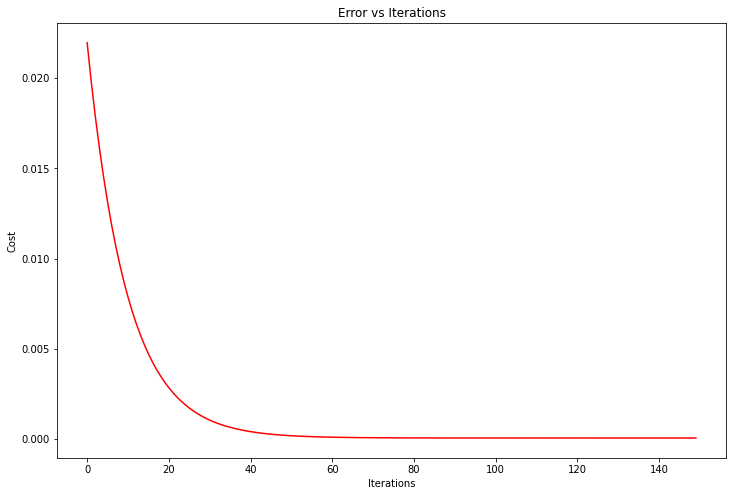

In [27]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Iterations')

In [28]:
import math
erro_r=[np.power((b-a),2)for(a,b)in zip (Model_price,y)]
error0=np.sum(erro_r)
error1=math.sqrt(error0)
error=(error1/len(y))*100



In [29]:
print ("error%={}".format (error))
accuracy= 100-error
print("accuracy%={}".format(accuracy))

error%=0.10627319469129685
accuracy%=99.8937268053087


In [37]:
def predict (new_theta,accuracy):
  size = float(input("enter the size of the house :"))
  size=(size-raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
  price=(new_theta[0,0]+(new_theta[0,1]*size))
  predicted_price=(price*(raw_data.Price.max()-raw_data.Price.min()))+(raw_data.Price.mean())
  price_at_max_accuracy=(predicted_price*(1/accuracy)*100)
  price_range=price_at_max_accuracy-predicted_price

  return predicted_price, price_range

predicted_price,price_range=predict(new_theta,accuracy)
print('your house cost is '+str(round(predicted_price,3))+' lakhs')


enter the size of the house :560
your house cost is 8.174 lakhs
